In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

In [3]:
batch_size = 40
img_height = 200
img_width = 200

Keras dataset preprocessing utilities, located at tf.keras.preprocessing, help you go from raw data on disk to a tf.data.Dataset object that can be used to train a model.

See https://keras.io/api/preprocessing/

Once the dataset is preprocessed and loaded, it can be directly used in calls to model.fit



In [4]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/MaskNoMask',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.


In [5]:
## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'data/MaskNoMask',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [6]:
training_ds

<BatchDataset shapes: ((None, 200, 200, 3), (None,)), types: (tf.float32, tf.int32)>

In [7]:
class_names = training_ds.class_names
print(class_names)

['Mask', 'NoMask']


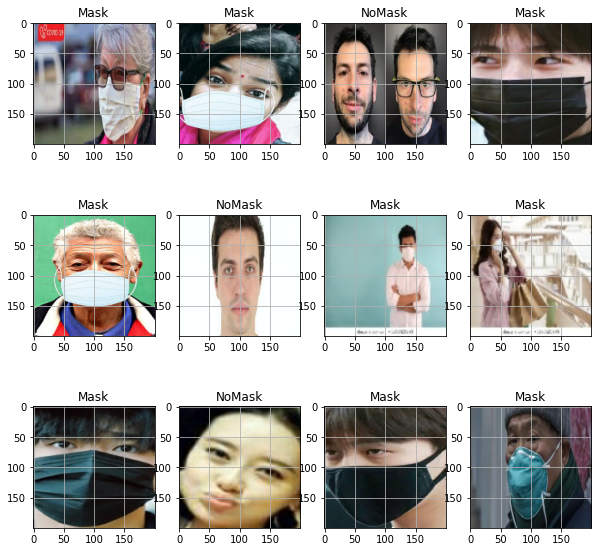

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [9]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Now build a deep neural network and train it and see how you do

# Building Sequential Model

In [10]:
from tensorflow.keras.models import Sequential
num_classes = 5

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

# Compiling model, assigning metrics, summary

In [39]:
model.compile(optimizer = 'adam', 
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0

# Training the model

In [41]:
epochs = 10
history = model.fit(
    training_ds,
    validation_data = testing_ds,
    epochs = epochs
)

Epoch 1/10
152/152 [==============================] - 78s 510ms/step - loss: 0.4629 - accuracy: 0.8259 - val_loss: 0.2354 - val_accuracy: 0.9007
Epoch 2/10
152/152 [==============================] - 78s 516ms/step - loss: 0.2298 - accuracy: 0.9088 - val_loss: 0.1977 - val_accuracy: 0.9159
Epoch 3/10
152/152 [==============================] - 77s 508ms/step - loss: 0.1717 - accuracy: 0.9318 - val_loss: 0.1764 - val_accuracy: 0.9291
Epoch 4/10
152/152 [==============================] - 78s 512ms/step - loss: 0.1315 - accuracy: 0.9492 - val_loss: 0.2452 - val_accuracy: 0.9152
Epoch 5/10
152/152 [==============================] - 77s 509ms/step - loss: 0.0986 - accuracy: 0.9639 - val_loss: 0.2032 - val_accuracy: 0.9192
Epoch 6/10
152/152 [==============================] - 79s 521ms/step - loss: 0.0739 - accuracy: 0.9720 - val_loss: 0.2256 - val_accuracy: 0.9338
Epoch 7/10
152/152 [==============================] - 75s 494ms/step - loss: 0.0595 - accuracy: 0.9780 - val_loss: 0.2673 - val_ac

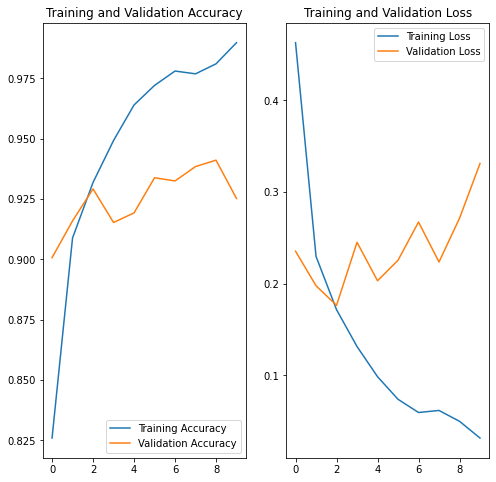

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [45]:
from tensorflow import keras
mayo_url = "https://www.mayoclinichealthsystem.org/-/media/national-files/images/hometown-health/2020/person-wearing-a-mask.jpg?h=370&w=660&la=en&hash=1C2BCBE2AE429A4850802B1CB340E79F"
mayo_path = tf.keras.utils.get_file('person-wearing-a-mask', origin=mayo_url)

img = keras.preprocessing.image.load_img(
    mayo_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to NoMask with a 99.75 percent confidence.


In [46]:
boy_url = "https://inst.eecs.berkeley.edu/~cs194-26/fa18/upload/files/proj4/cs194-26-aaj/web/morph/boy.png"
boy_path = tf.keras.utils.get_file('boy', origin=boy_url)

img = keras.preprocessing.image.load_img(
    boy_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)



278528/277187 [==============================] - 0s 0us/step
This image most likely belongs to NoMask with a 100.00 percent confidence.


In [47]:
girl_url = "https://inst.eecs.berkeley.edu/~cs194-26/fa18/upload/files/proj4/cs194-26-aaj/web/morph/girl.png"
girl_path = tf.keras.utils.get_file('girl', origin=girl_url)

img = keras.preprocessing.image.load_img(
    girl_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)




294912/293818 [==============================] - 0s 0us/step
This image most likely belongs to NoMask with a 100.00 percent confidence.


In [48]:
girl_mask_url = "https://image.cnbcfm.com/api/v1/image/106467352-1585602933667virus-medical-flu-mask-health-protection-woman-young-outdoor-sick-pollution-protective-danger-face_t20_o07dbe.jpg?v=1585602987&w=1400&h=950"
girl_mask_path = tf.keras.utils.get_file('106467352-1585602933667virus-medical-flu-mask-health-protection-woman-young-outdoor-sick-pollution-protective-danger-face_t20_o07dbe', origin=girl_mask_url)

img = keras.preprocessing.image.load_img(
    girl_mask_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)





106496/105730 [==============================] - 0s 0us/step
This image most likely belongs to Mask with a 99.95 percent confidence.


In [38]:
data_augmentation = keras.Sequential(
    [ 
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                input_shape = (img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

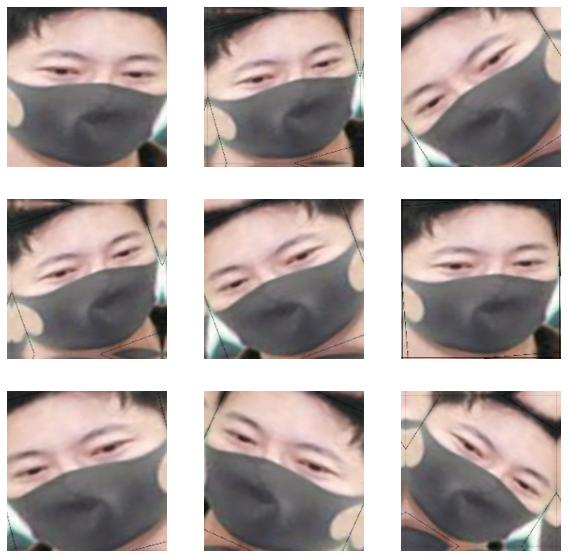

In [39]:
plt.figure(figsize=(10, 10))
for images, _ in training_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [40]:
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [41]:
model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics = ['accuracy', 
                        tf.keras.metrics.Recall(), 
                        tf.keras.metrics.Precision(), 
                        tf.keras.metrics.TruePositives(thresholds=None, name=None, dtype=None), 
                        tf.keras.metrics.TrueNegatives(thresholds=None, name=None, dtype=None), 
                        tf.keras.metrics.FalsePositives(thresholds=None, name=None, dtype=None), 
                        tf.keras.metrics.FalseNegatives(thresholds=None, name=None, dtype=None)
                       ])

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 200, 200, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 64)       

In [43]:
epochs = 15
history = model.fit(
    training_ds,
    validation_data = testing_ds,
    epochs = epochs
)

Epoch 1/15
152/152 [==============================] - 93s 609ms/step - loss: 0.4320 - accuracy: 0.8066 - recall_4: 0.8408 - precision_4: 0.7905 - true_positives_3: 2573.0000 - true_negatives_2: 2301.0000 - false_positives_2: 682.0000 - false_negatives_2: 487.0000 - val_loss: 0.3305 - val_accuracy: 0.8497 - val_recall_4: 0.7331 - val_precision_4: 0.9624 - val_true_positives_3: 563.0000 - val_true_negatives_2: 720.0000 - val_false_positives_2: 22.0000 - val_false_negatives_2: 205.0000
Epoch 2/15
152/152 [==============================] - 99s 653ms/step - loss: 0.2993 - accuracy: 0.8770 - recall_4: 0.8605 - precision_4: 0.8928 - true_positives_3: 2633.0000 - true_negatives_2: 2667.0000 - false_positives_2: 316.0000 - false_negatives_2: 427.0000 - val_loss: 0.2576 - val_accuracy: 0.8854 - val_recall_4: 0.8255 - val_precision_4: 0.9421 - val_true_positives_3: 634.0000 - val_true_negatives_2: 703.0000 - val_false_positives_2: 39.0000 - val_false_negatives_2: 134.0000
Epoch 3/15
152/152 [====

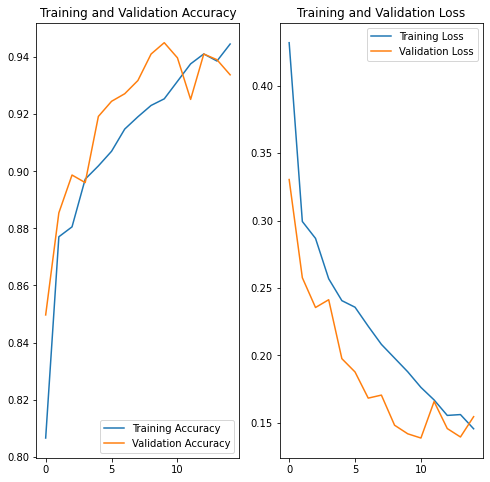

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
ypred = model.predict(testing_ds)
ypred = np.where(ypred > 0.5, 1, 0)
ytrue = [y for x, y in testing_ds]
ytrue = np.concatenate(ytrue)
from sklearn import metrics
print(metrics.classification_report(ytrue, ypred))
print(metrics.confusion_matrix(ytrue, ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       742
           1       0.98      0.89      0.93       768

    accuracy                           0.93      1510
   macro avg       0.94      0.93      0.93      1510
weighted avg       0.94      0.93      0.93      1510

[[726  16]
 [ 84 684]]
